In [4]:
뎃타 = pd.read_excel("예측값.xlsx")

In [16]:
예측값 = 뎃타["예측값"][-16:]
실제값 = 뎃타["실제값"]

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import operator
plt.xkcd()
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc("font",family=font_name)
korea=gpd.read_file('전국시각화.json')

In [3]:
korea['name']=korea['name'].replace(['제주특별자치도','세종특별자치시','울산광역시','대전광역시','광주광역시','인천광역시',\
                                     '대구광역시','부산광역시','서울특별시',],['제주도','세종시','울산시','대전시','광주시',\
                                     '인천시','대구시','부산시','서울시'])

In [12]:
예측값[0]

2.127099008758597

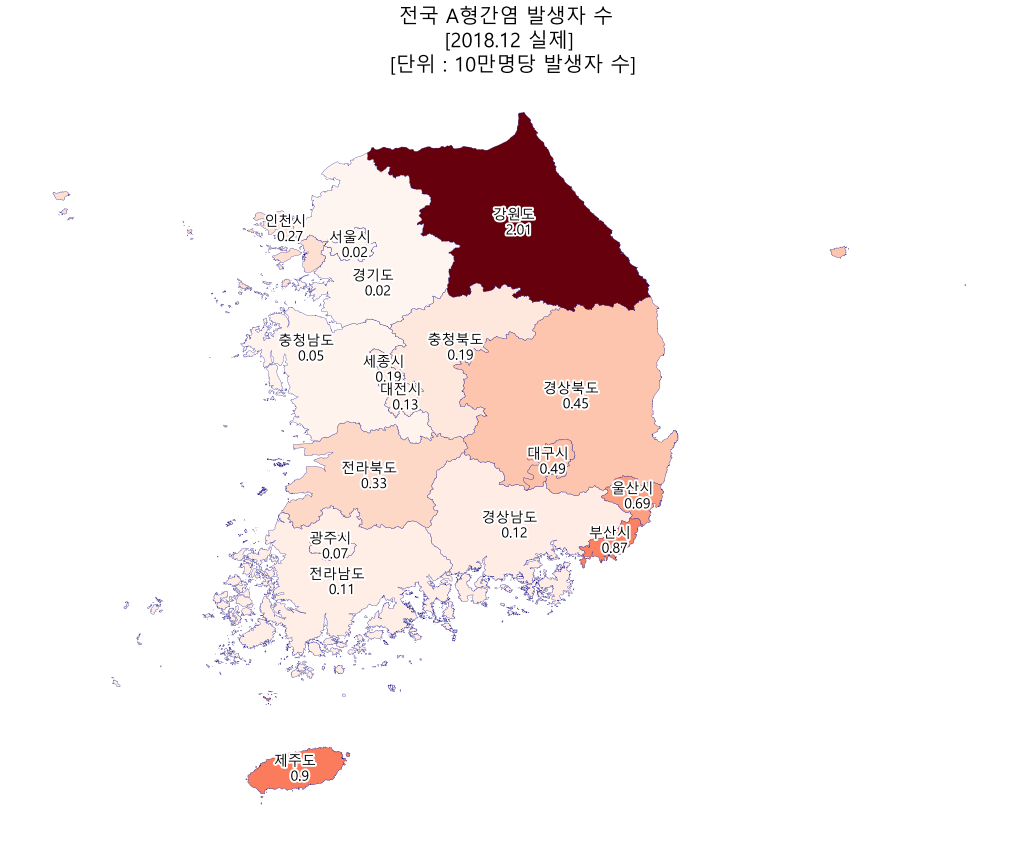

In [26]:
data= 실제값
when = "환자 수"
#pat = data.iloc[:,0]
pat_list = []
for i in 실제값 :
    pat_list.append(round(i,2))
a1,a2 = pat_list[0],pat_list[1] #강원경기
b1,b2 = pat_list[2],pat_list[3] #경남경북
c1,c2 = pat_list[4],pat_list[5] #광주대구
d1,d2 = pat_list[6],pat_list[7] #대전부산
e1,e2 = pat_list[8],pat_list[9] #서울울산
f1,f2 = pat_list[10],pat_list[11] #인천전남
g1,g2 = pat_list[12],pat_list[13]#전북제주
h1,h2 = pat_list[14],pat_list[15]#충남충북

where = {
    '제주도':g2,'경상남도':b1,'경상북도':b2,'전라남도':f2,
    '전라북도':g1,'충청남도':h1,'충청북도':h2,'강원도':a1,
    '경기도':a2,'세종시':h2,'울산시':e2,'대전시':d1,
    '광주시':c1,'인천시':f1,'대구시':c2,'부산시':d2,'서울시':e1}


where_df = pd.DataFrame(list(where.items()), columns = ["name", 'percent'])
data_result=pd.merge(korea,where_df,on='name')
data_result["sum"] = data_result["name"].map(str) +' \n '+ data_result["percent"].map(str)

final_pic=data_result.plot( figsize=(18,15),linewidth=0.25, edgecolor='navy',
                           column='percent',cmap='Reds',legend=False,)

for index,row in data_result.iterrows():
    xy=row['geometry'].centroid.coords[:]
    xytext=row['geometry'].centroid.coords[:]
    
    if row['name'] == '경기도':
        xytext[0]=tuple(map(operator.add, xytext[0], (0,-0.3)))
    elif row['name'] == '인천시':
        xytext[0]=tuple(map(operator.add, xytext[0], (0.1,0.1)))
    elif row['name'] == '충청남도':
        xytext[0]=tuple(map(operator.add, xytext[0], (-0.2,0.2)))
#     elif row['name'] == '대전시':
#         xytext[0]=tuple(map(operator.add, xytext[0], (0,-0.1)))
    
    
    plt.annotate(row['sum'],xy=xy[0], xytext=xytext[0],
                 horizontalalignment='center',verticalalignment='center')
    plt.axis('off')

plt.title("전국 A형간염 발생자 수 \n [2018.12 실제] \n [단위 : 10만명당 발생자 수]".format(when),
          fontsize=20)
plt.show()

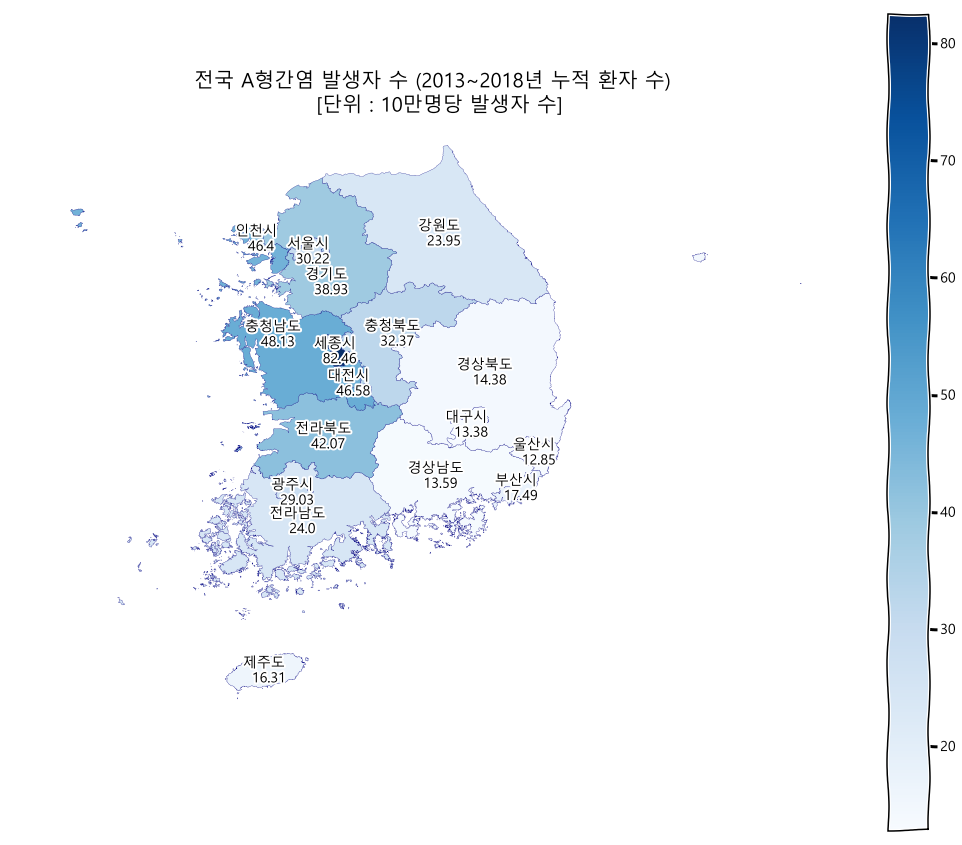

In [212]:
korea_fig=final_pic.get_figure()
korea_fig.savefig('C:/Users/dhrtj/Desktop/map_2016_2018/korea_map{}.png'.format(when),transparent=True)

In [82]:
# seoul_fig=final_pic.get_figure()
# seoul_fig.savefig('./전국_발생_맵/{}'.format(when),transparent=True)

# korea_fig=final_pic.get_figure()
# korea_fig.savefig('C:/Users/dhrtj/Desktop/map/korea_map{}.png'.format(when),transparent=True)